In [11]:
# 1. Análisis Exploratorio de Datos

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering
from sklearn.metrics import silhouette_score, calinski_harabasz_score
from scipy.cluster.hierarchy import dendrogram, linkage

# Cargar los datos
df = pd.read_csv('C:/Users/Usuario/Downloads/archive (4)/Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [13]:
# Resumen estadístico
df.describe()


,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


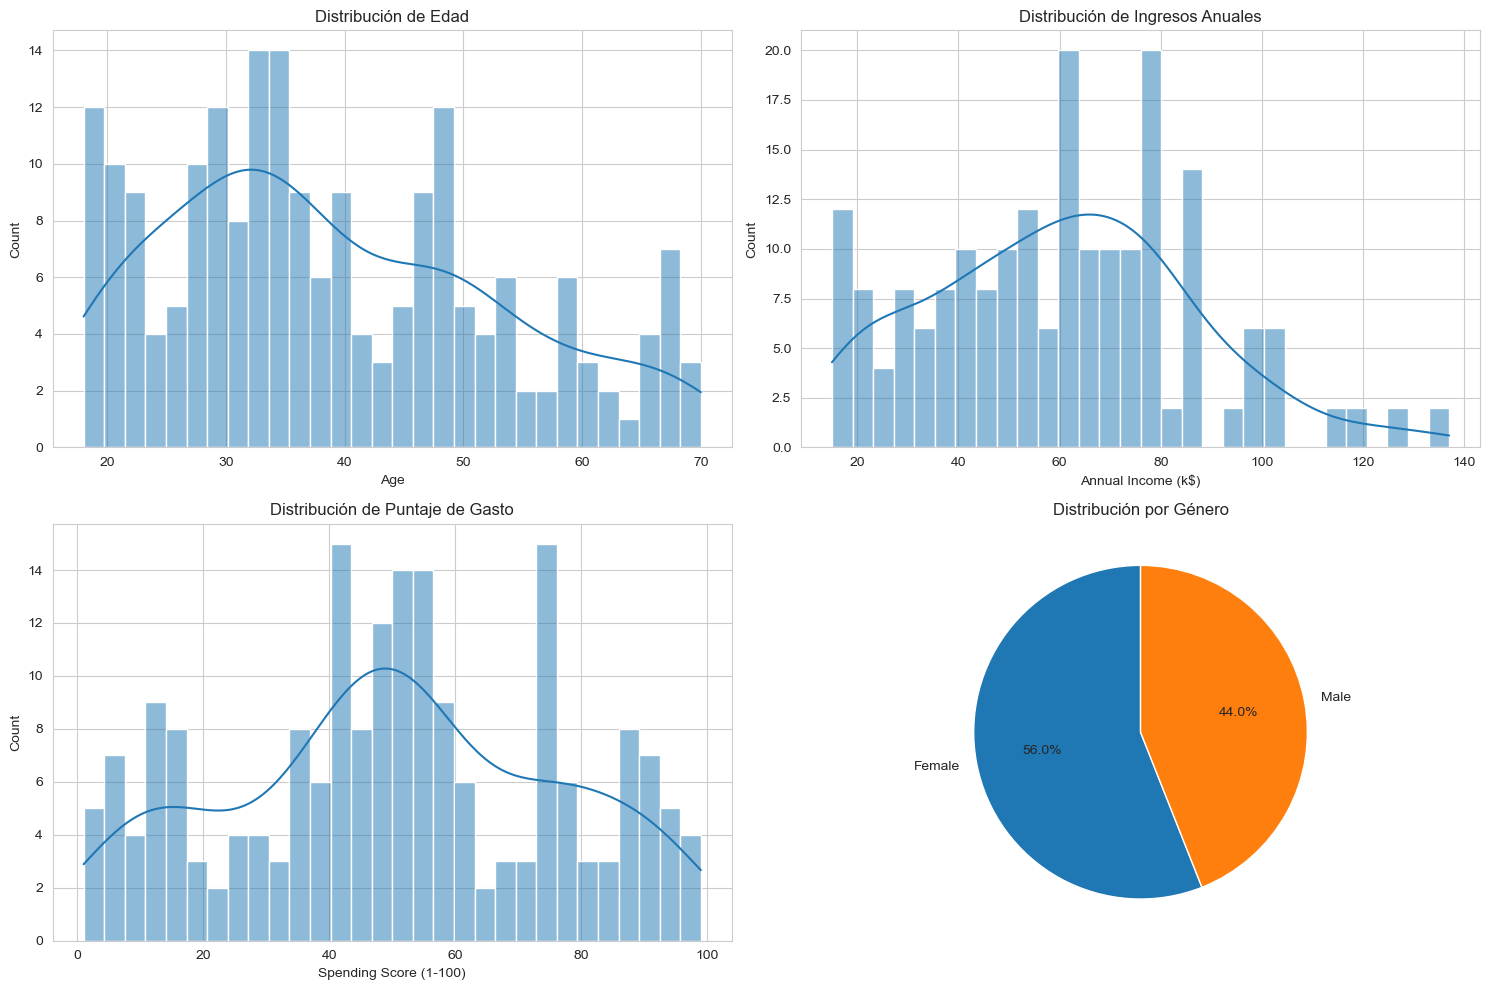

In [19]:
# Distribución de variables

# Configurar el estilo de los gráficos
sns.set_style("whitegrid")

# Crear subplots
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Gráfico 1: Distribución de edad
sns.histplot(df['Age'], bins=30, kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Distribución de Edad')

# Gráfico 2: Distribución de ingresos anuales
sns.histplot(df['Annual Income (k$)'], bins=30, kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Distribución de Ingresos Anuales')

# Gráfico 3: Distribución de puntaje de gasto
sns.histplot(df['Spending Score (1-100)'], bins=30, kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Distribución de Puntaje de Gasto')

# Gráfico 4: Distribución por género
gender_counts = df['Gender'].value_counts()
axes[1, 1].pie(gender_counts, labels=gender_counts.index, autopct='%1.1f%%', startangle=90)
axes[1, 1].set_title('Distribución por Género')

plt.tight_layout()
plt.show()


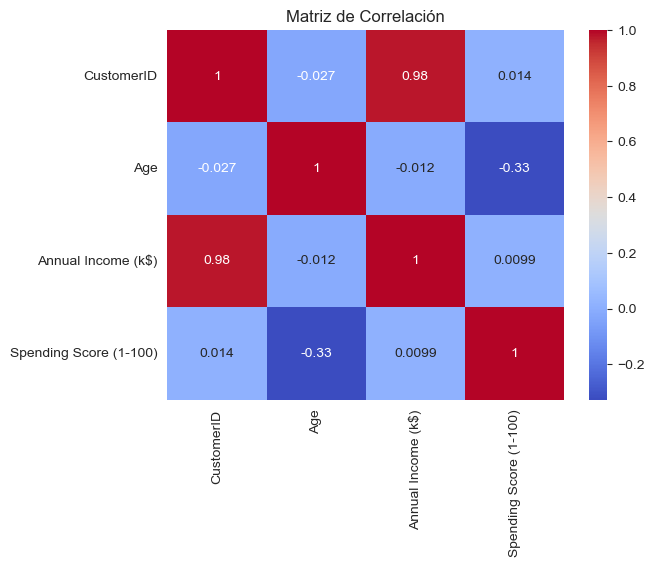

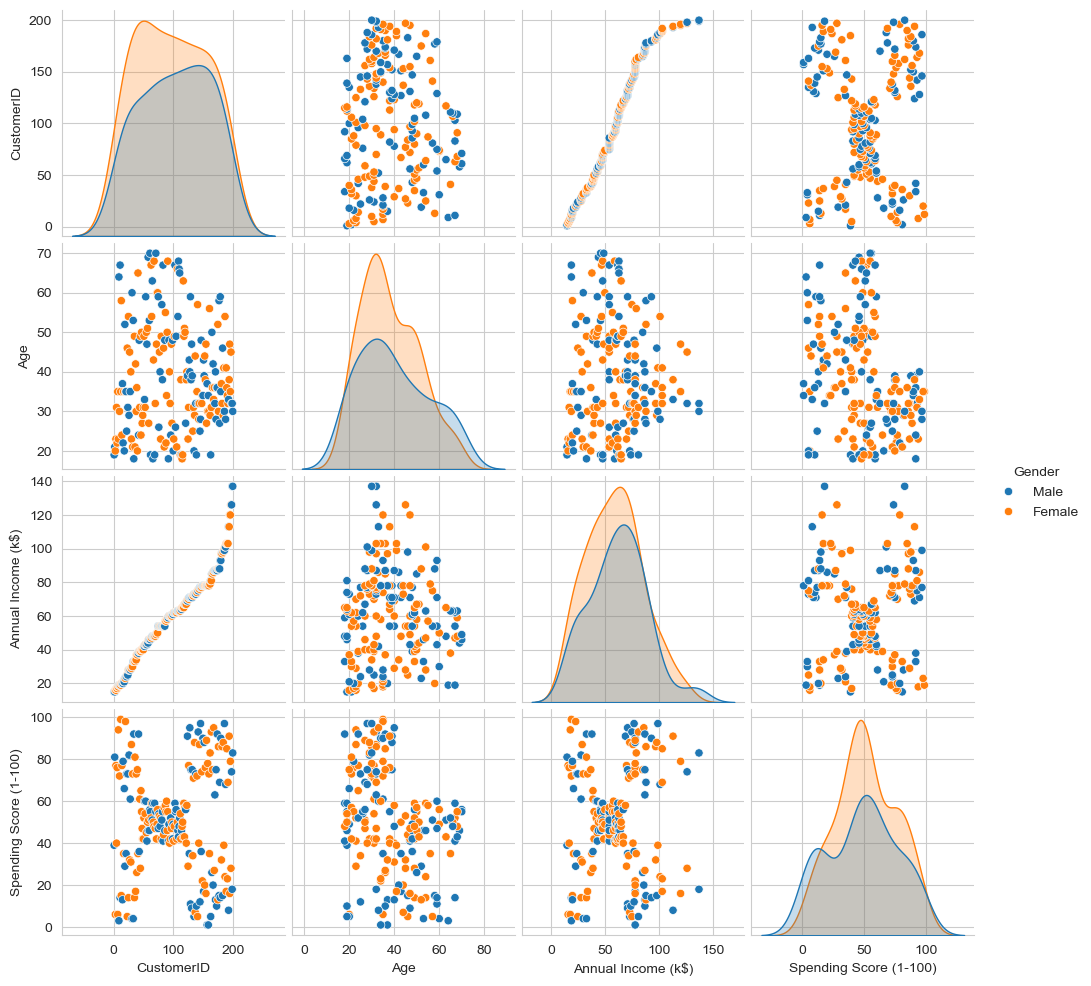

In [21]:
# Relaciones entre variables

# Matriz de correlación
corr_matrix = df.corr(numeric_only=True)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

# Pairplot para visualizar relaciones
sns.pairplot(df, hue='Gender', diag_kind='kde')
plt.show()

In [23]:
# 2. Preprocesamiento de Datos

# Verificar valores faltantes
print(df.isnull().sum())

# Codificar variable categórica (Gender)
df['Gender'] = df['Gender'].map({'Male': 0, 'Female': 1})

# Normalizar los datos
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']])


CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [27]:
# 3. Selección de Características

# Seleccionar características para clustering
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]  # Las más correlacionadas y relevantes para segmentación comercial

C:\Users\Usuario\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Usuario\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Usuario\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Usuario\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak o

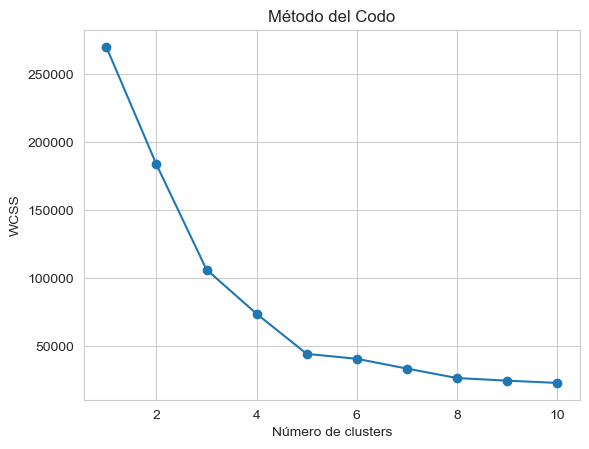

In [29]:
# 4. Modelo K-means

# Método del codo
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss, marker='o')
plt.title('Método del Codo')
plt.xlabel('Número de clusters')
plt.ylabel('WCSS')
plt.show()




In [65]:
# Elegimos 5 clusters basados en el método del codo

kmeans = KMeans(n_clusters=5, init='k-means++', random_state=42)
kmeans.fit(X)
df['Cluster_Kmeans'] = kmeans.labels_


C:\Users\Usuario\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\Usuario\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


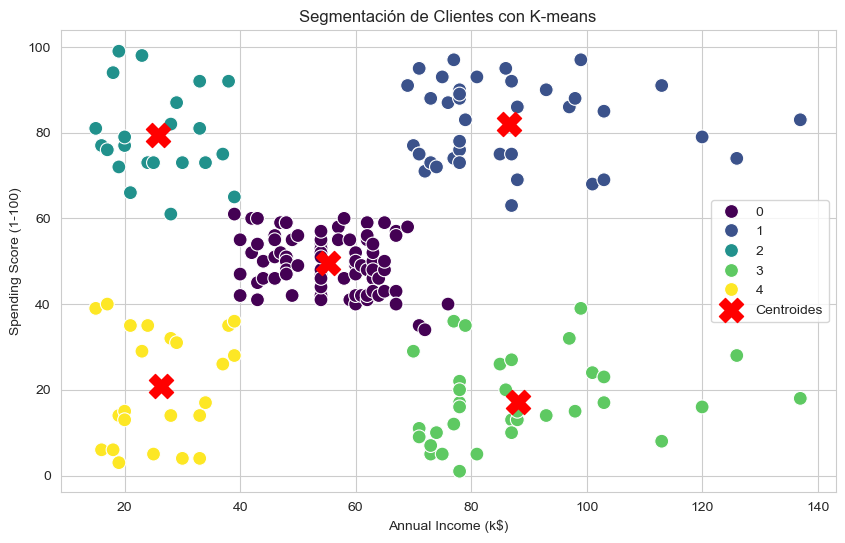

In [35]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', 
                hue='Cluster_Kmeans', palette='viridis', s=100)
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], 
            s=300, c='red', marker='X', label='Centroides')
plt.title('Segmentación de Clientes con K-means')
plt.legend()
plt.show()

In [37]:
silhouette_avg = silhouette_score(X, kmeans.labels_)
calinski_harabasz = calinski_harabasz_score(X, kmeans.labels_)

print(f"Coeficiente de Silhouette: {silhouette_avg:.2f}")
print(f"Índice de Calinski-Harabasz: {calinski_harabasz:.2f}")

Coeficiente de Silhouette: 0.55
Índice de Calinski-Harabasz: 247.36


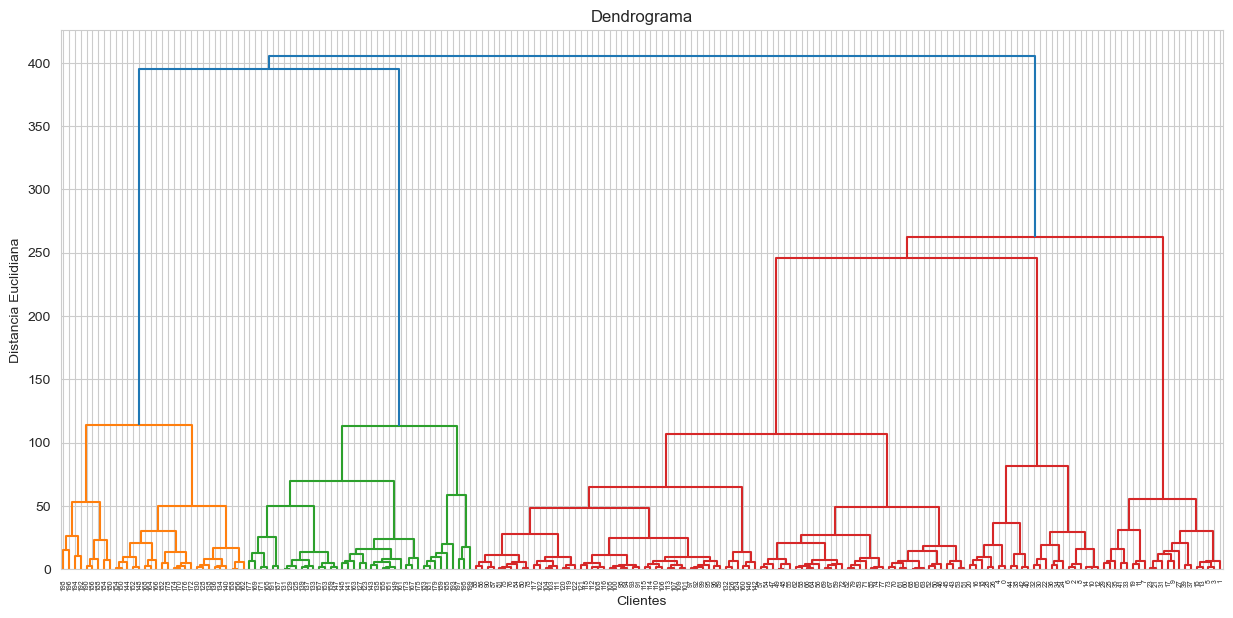

In [53]:
# 5. Clustering Jerárquico

# Calcular la matriz de enlace Dendrograma
linked = linkage(X, method='ward')

# Plot del dendrograma
plt.figure(figsize=(15, 7))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Dendrograma')
plt.xlabel('Clientes')
plt.ylabel('Distancia Euclidiana')
plt.show()


In [59]:
# Elegimos 5 clusters basados en el dendrograma
hierarchical = AgglomerativeClustering(n_clusters=5, metric='euclidean', linkage='ward')
df['Cluster_Hierarchical'] = hierarchical.fit_predict(X)

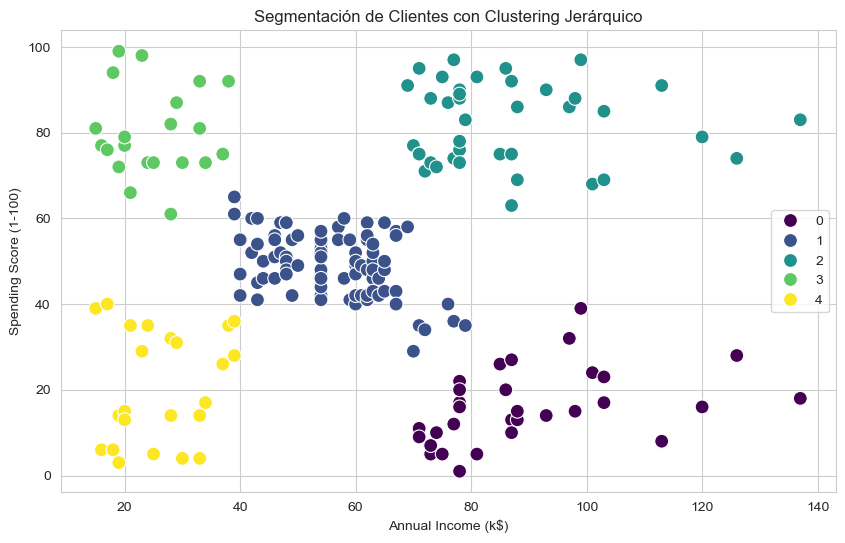

In [61]:
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', 
                hue='Cluster_Hierarchical', palette='viridis', s=100)
plt.title('Segmentación de Clientes con Clustering Jerárquico')
plt.legend()
plt.show()

In [63]:
silhouette_avg = silhouette_score(X, hierarchical.labels_)
calinski_harabasz = calinski_harabasz_score(X, hierarchical.labels_)

print(f"Coeficiente de Silhouette: {silhouette_avg:.2f}")
print(f"Índice de Calinski-Harabasz: {calinski_harabasz:.2f}")

Coeficiente de Silhouette: 0.55
Índice de Calinski-Harabasz: 243.07


In [67]:
# 6. Interpretación de Resultados
cluster_profile = df.groupby('Cluster_Kmeans')[['Age', 'Annual Income (k$)', 'Spending Score (1-100)']].mean()
print(cluster_profile)

                      Age  Annual Income (k$)  Spending Score (1-100)
Cluster_Kmeans                                                       
0               42.716049           55.296296               49.518519
1               32.692308           86.538462               82.128205
2               25.272727           25.727273               79.363636
3               41.114286           88.200000               17.114286
4               45.217391           26.304348               20.913043


In [71]:
# Comparación entre los dos métodos
comparison = pd.crosstab(df['Cluster_Kmeans'], df['Cluster_Hierarchical'], 
                         rownames=['K-means'], colnames=['Hierarchical'])
print(comparison)

Hierarchical   0   1   2   3   4
K-means                         
0              0  81   0   0   0
1              0   0  39   0   0
2              0   1   0  21   0
3             32   3   0   0   0
4              0   0   0   0  23
